In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
save_images = False
sep = ","
enc = "utf-8"
file = "cc_vary_t.csv"
df = pd.read_csv(file, sep=sep, header=0, encoding=enc)

In [3]:
t_params = [0.5, 0.6, 0.7, 0.8, 0.9]
dfs = []
for t_param in t_params:
    tmp_df = df[df["T"] == t_param]
    dfs.append(tmp_df)

In [4]:
def plot_alg_box(dfs, k_params, feat="OOA", suffixes=["CC"], ylabel=None,
        print_latex=False, ylim=None, figsize=(12,8), yticks=None, float_format="%.2f"):
    col_names = []
    title = feat
    for i in range(len(suffixes)):
        suffix = suffixes[i]
        col_name = feat + "_" + suffix
        col_names.append(col_name)
    sub_dfs = []
    for i in range(len(dfs)):
        df = dfs[i]
        sub_df = df.loc[:, col_names]
        sub_df.columns = [str(k_params[i])]
        sub_dfs.append(sub_df)
    sub_df = pd.concat(sub_dfs, axis=1)
    if print_latex:
        df_desc = sub_df.describe(include="all")
        df_desc = df_desc.loc[["mean", "std", "25%", "50%", "75%"]]
        latex_str = df_desc.to_latex(escape=False, float_format=float_format)
        latex_str = latex_str.replace("_", "\_")
        latex_str = latex_str.replace("%", "\%")
        latex_str = latex_str.replace("|S|", "$|\mathcal{S}|$")
        
        print(latex_str)
    
    sub_df.plot(kind="box", figsize=figsize, rot=90, title=title, grid=True,
        showmeans=True, ylabel=ylabel, ylim=ylim, yticks=yticks)

\begin{tabular}{lrrrrr}
\toprule
{} &  0.5 &  0.6 &  0.7 &  0.8 &  0.9 \\
\midrule
mean & 0.26 & 0.41 & 0.25 & 0.22 & 0.22 \\
std  & 0.13 & 0.13 & 0.12 & 0.09 & 0.09 \\
25\%  & 0.17 & 0.32 & 0.17 & 0.16 & 0.16 \\
50\%  & 0.22 & 0.39 & 0.22 & 0.20 & 0.20 \\
75\%  & 0.32 & 0.48 & 0.28 & 0.26 & 0.26 \\
\bottomrule
\end{tabular}



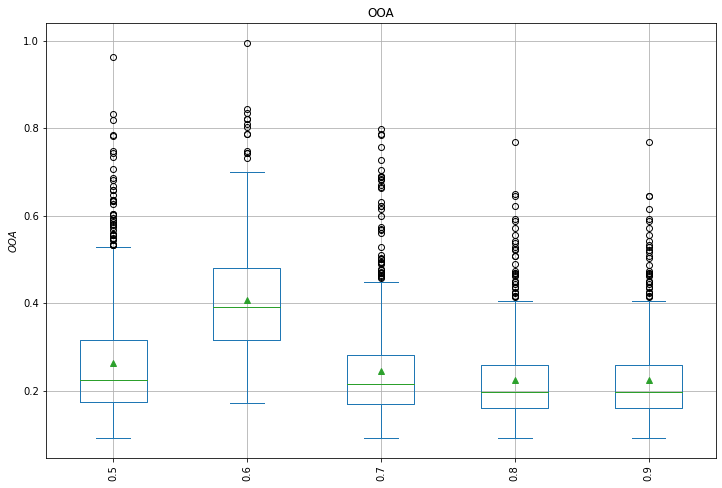

In [5]:
plot_alg_box(dfs=dfs, k_params=t_params, feat="OOA", ylabel=r"$OOA$", print_latex=True, suffixes=["CC"])
if save_images:
    plt.savefig("cc_vs_fh04_ooa.png", bbox_inches="tight")

\begin{tabular}{lrrrrr}
\toprule
{} &  0.5 &   0.6 &  0.7 &  0.8 &  0.9 \\
\midrule
mean & 4.04 & 20.67 & 6.45 & 1.10 & 1.00 \\
std  & 3.75 & 13.11 & 6.08 & 0.58 & 0.00 \\
25\%  & 2.00 & 11.00 & 3.00 & 1.00 & 1.00 \\
50\%  & 3.00 & 18.00 & 5.00 & 1.00 & 1.00 \\
75\%  & 5.00 & 28.00 & 8.00 & 1.00 & 1.00 \\
\bottomrule
\end{tabular}



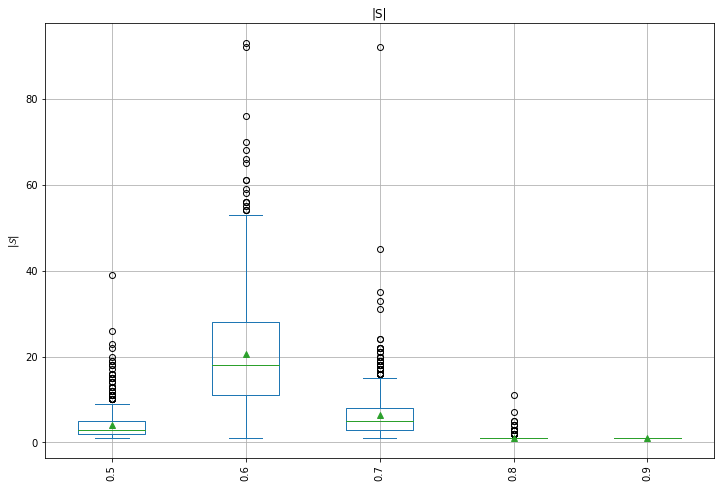

In [6]:
plot_alg_box(dfs=dfs, k_params=t_params, feat="|S|", ylabel=r"$|\mathcal{S}|$", print_latex=True, suffixes=["CC"])
if save_images:
    plt.savefig("cc_vs_fh04_sizes.png", bbox_inches="tight")

\begin{tabular}{lrrrrr}
\toprule
{} &    0.5 &    0.6 &    0.7 &    0.8 &    0.9 \\
\midrule
mean & 0.0073 & 0.0922 & 0.0147 & 0.0000 & 0.0000 \\
std  & 0.0426 & 0.1153 & 0.0624 & 0.0006 & 0.0001 \\
25\%  & 0.0000 & 0.0114 & 0.0000 & 0.0000 & 0.0000 \\
50\%  & 0.0000 & 0.0446 & 0.0002 & 0.0000 & 0.0000 \\
75\%  & 0.0003 & 0.1338 & 0.0018 & 0.0000 & 0.0000 \\
\bottomrule
\end{tabular}



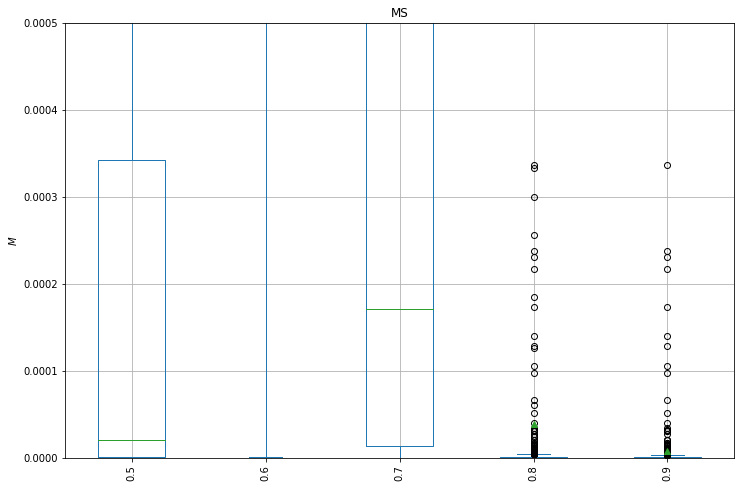

In [7]:
plot_alg_box(dfs=dfs, k_params=t_params, feat="MS", ylabel=r"$M$", print_latex=True,
    suffixes=["CC"], float_format="%.4f"
    , ylim=[0.000, 0.0005]
    )
if save_images:
    plt.savefig("cc_vs_fh04_ms.png", bbox_inches="tight")